# **Data Science and STEM Salaries**



Wanxing Dai


## Instructions

“Data Scientist” is one of the hottest jobs on the market today, as you’re surely aware. Over 60,000
data scientist salaries were scraped from levels.fyi along with some information about the employee
submitting the data. Using this data, we want you to figure out what factors best predict the overall
total compensation of a data scientist. Your task is to create a 1-4 page PDF containing your
findings. This should include any relevant graphs and tables. Please also include a file with your
raw code for our review.
Please format the PDF as if you are going to present it to someone who is familiar with analytics
concepts but is not an expert in the field. This PDF will be presented in your WAF interview. For the
format of this PDF, feel free to create a PowerPoint Presentation, Jupyter Notebook, Google/Word
Doc, Tableau Dashboard, or any other product you are comfortable with.
Note: The timeframe for this challenge has been shortened so that you don’t spend too much
time on it. We do not expect your final deliverable to look like a professional slide deck. We
suggest you spend most of your time on understanding the data and finding insights -- a basic
presentation is fine as long as you get the relevant information across.
The dataset is available on Kaggle at this link. Be sure to look through the data on Kaggle, as each
column has a short description explaining what its values mean.
Our team has looked at the data and given you a few tasks that you may be interested in completing.
You may choose to tackle some, all, or none of them. Again, however, you are free to examine and
present the data however you like.

1. Does the data have any interesting quirks or features? Missing rows/numbers? How are the
distributions for each column? Are there any important data cleaning or data processing tasks you
need to complete before you start building a model?
2. What can you tell us about the most well-paid individuals? What about their experience,
characteristics, or position makes them well-paid?
3. There are 28 columns you can use to predict total yearly compensation. Which columns did you
use? How did you come to that conclusion? Are there any variables that are highly correlated with
each other in either direction?
4. Is it “worth it” to pursue a graduate degree in exchange for potentially higher compensation? Be
prepared to defend your assumptions. (Note: this question is intentionally ambiguous – we encourage
you to come up with your own interpretation!)

**Data Source**

https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries


In [97]:
import numpy as np
import pandas as pd
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
# import data
df = pd.read_csv('salaries.csv')
data = df
print("shape: ", df.shape)
df.head()

shape:  (62642, 29)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [99]:
df.totalyearlycompensation.describe()

count    6.264200e+04
mean     2.163004e+05
std      1.380337e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.640000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

In [100]:
df['company'].value_counts()

Amazon             8126
Microsoft          5216
Google             4330
Facebook           2990
Apple              2028
                   ... 
Activecampaign        1
SAS institute         1
Jp morgan chase       1
Saic                  1
ARUBA                 1
Name: company, Length: 1631, dtype: int64

## Data cleaning

In [101]:
# check missing values
# --------------------------------------------
print("Count of missing values in each column:")
df.isna().sum()

Count of missing values in each column:


timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

The column gender, otherdetails, Race, and Education have over 15000
missing values.

In [102]:
# check missing values
# --------------------------------------------
print("Count of maximum missing values in row:")
np.max(df.isna().sum(axis=1))

Count of maximum missing values in row:


6

In [103]:
df_clean = df.dropna(axis=0)
df_clean.drop(columns=['rowNumber'], inplace=True)
df_clean.head()

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


Convert timstamp to datetime

In [104]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_clean['gender_org'] = df_clean['gender']
df_clean = pd.get_dummies(df_clean, columns=['gender'])

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

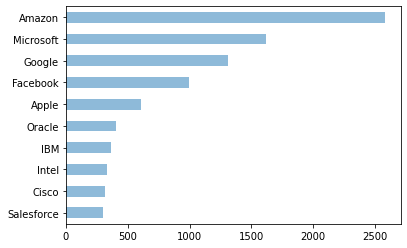

In [106]:
df_clean['company'].value_counts()
df_clean['company'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

In [107]:
df_clean['gender_org'].value_counts()

Male      17556
Female     3863
Other       102
Name: gender_org, dtype: int64

Text(0, 0.5, 'Gender')

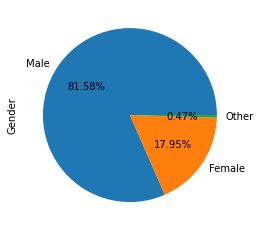

In [108]:
ax = df_clean['gender_org'].value_counts().plot(kind = "pie", autopct=lambda p:f'{p:.2f}%')
ax.set_ylabel("Gender")

In [109]:
df_clean['otherdetails'].value_counts()

Race: Asian, Academic Level: Master’s degree                                                         1205
Race: White, Academic Level: Bachelor’s degree                                                       1069
Race: Asian, Academic Level: Bachelor’s degree                                                        968
Title: Software Engineer, Race: Asian, Academic Level: Master’s degree                                722
Title: Software Engineer, Race: Asian, Academic Level: Bachelor’s degree                              659
                                                                                                     ... 
401k match, stock purchase plan, Title: Associate, Race: White, Academic Level: Bachelor’s degree       1
Title: Solutions Architect 2, Race: Asian, Academic Level: Bachelor’s degree                            1
Title: Senior Quantitative Risk Analyst, Race: White, Academic Level: Master’s degree                   1
Remote, Title: Senior Staff Software Engineer,

In [110]:
df_clean[df_clean['otherdetails']=='7.5K relocation (Remote), Title: Applied Researcher, Race: Asian, Academic Level: Master’s degree']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,gender_org,gender_Female,gender_Male,gender_Other
42091,2021-02-15 12:42:06,eBay,SE 2,Data Scientist,176000,"San Jose, CA",2.0,0.0,general,133000.0,...,0,0,0,0,Asian,Master's Degree,Male,0,1,0


<AxesSubplot:>

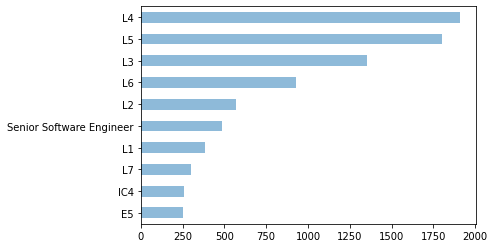

In [111]:
df_clean['level'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

In [112]:
len(df_clean['tag'].unique()), len(df_clean['level'].unique())

(1542, 1601)

<AxesSubplot:>

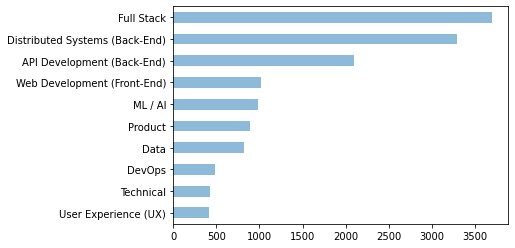

In [113]:
df_clean['tag'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

<AxesSubplot:>

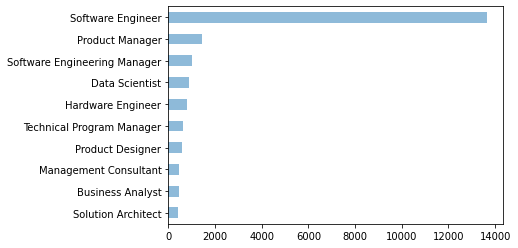

In [114]:
df_clean['title'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

<AxesSubplot:>

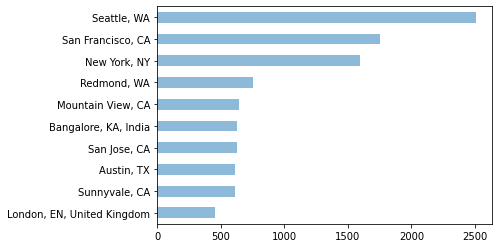

In [115]:
df_clean['location'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

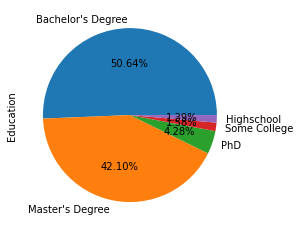

In [116]:
ax = df_clean['Education'].value_counts().plot(kind = "pie", autopct=lambda p:f'{p:.2f}%')

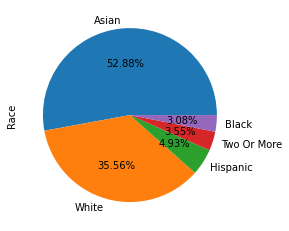

In [117]:
ax = df_clean['Race'].value_counts().plot(kind = "pie", autopct=lambda p:f'{p:.2f}%')

In [118]:
df_clean.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'otherdetails', 'cityid', 'dmaid',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'Race', 'Education', 'gender_org',
       'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

In [119]:
df_clean.duplicated().sum()

0

There is no missing data or duplicate in the df_clean now. We are ready to start explore the data.

## **Preliminary Exploratory Data Analysis (EDA)**



## **Pre-Analysis Questions**




### Basic statistics

In [120]:
# Split 80% of data to train the supervised classifer and 20% for validation
train, test = train_test_split(df_clean, test_size=0.20, random_state=12)

In [121]:
gender_train, gender_test = train['gender_org'], test['gender_org']
race_train, race_test = train['Race'], test['Race']
education_train, education_test = train['Education'], test['Education']

In [122]:
# # define X and Y for train
# # --------------------------------------------
X = pd.get_dummies(train, columns=['gender_org'])
X = pd.get_dummies(X, columns=['title'])
X_train = X.drop(['totalyearlycompensation','basesalary', 'bonus','stockgrantvalue', 'Race', 'Education','location','otherdetails','tag','level','timestamp','company'], axis=1).copy()
Y_train = train["totalyearlycompensation"] >= 200000
# salary_ranges = [0,80000,200000,np.inf]
# Y_train = pd.cut(train.totalyearlycompensation, salary_ranges, labels=[0,1,2], include_lowest=True)

# descriptive statistics
# --------------------------------------------
X_train.describe()

,yearsofexperience,yearsatcompany,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
count,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,...,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000
mean,7.118436,2.692321,10183.010455,561.697433,0.423734,0.504124,0.042983,0.014115,0.015160,0.528636,...,0.016496,0.011733,0.027997,0.067031,0.010223,0.009816,0.636211,0.047107,0.019052,0.028171
std,5.849261,3.310684,7723.940418,315.173289,0.494164,0.499998,0.202825,0.117968,0.122194,0.499194,...,0.127378,0.107686,0.164970,0.250082,0.100594,0.098593,0.481103,0.211875,0.136712,0.165467
min,0.000000,0.000000,1153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,7322.000000,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,2.000000,8198.000000,751.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,4.000000,11521.000000,807.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,45.000000,40.000000,47926.000000,881.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
# defien X and Y for test
X = pd.get_dummies(test, columns=['gender_org'])
X = pd.get_dummies(X, columns=['title'])
X_test = X.drop(['totalyearlycompensation','basesalary', 'bonus','stockgrantvalue', 'Race', 'Education','location','otherdetails','tag','level','timestamp','company'], axis=1).copy()
Y_test = test["totalyearlycompensation"] >= 200000
# Y_test = pd.cut(test.totalyearlycompensation, salary_ranges, labels=[0,1,2], include_lowest=True)

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17216 entries, 53459 to 49429
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yearsofexperience                   17216 non-null  float64
 1   yearsatcompany                      17216 non-null  float64
 2   cityid                              17216 non-null  int64  
 3   dmaid                               17216 non-null  float64
 4   Masters_Degree                      17216 non-null  int64  
 5   Bachelors_Degree                    17216 non-null  int64  
 6   Doctorate_Degree                    17216 non-null  int64  
 7   Highschool                          17216 non-null  int64  
 8   Some_College                        17216 non-null  int64  
 9   Race_Asian                          17216 non-null  int64  
 10  Race_White                          17216 non-null  int64  
 11  Race_Two_Or_More                    1

In [125]:
# descriptive statistics of Y
Y_train.value_counts()

False    10444
True      6772
Name: totalyearlycompensation, dtype: int64

In [126]:
Y_test.value_counts()

False    2585
True     1720
Name: totalyearlycompensation, dtype: int64

In the training dataset, there are 2617 employees who makes more than 30k per year and 12599 whose yearly compensation is below 30k.

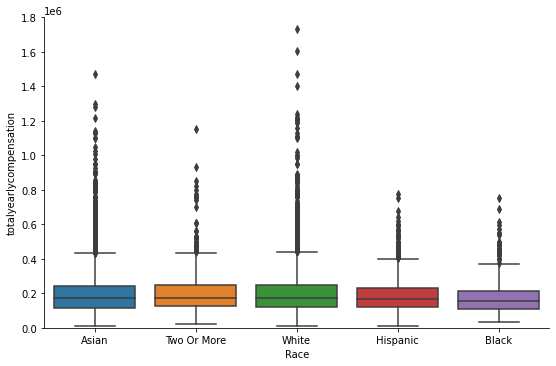

In [127]:
ax = sns.catplot(x="Race", y="totalyearlycompensation", kind="box", data=df_clean, aspect=1.5)
ax.set(ylim=(0, 1800000))

In [128]:
df_clean['totalyearlycompensation'].median()

174000.0

In [129]:
df_clean.groupby('gender_org')['totalyearlycompensation'].median()

gender_org
Female    170000
Male      175000
Other     171500
Name: totalyearlycompensation, dtype: int64

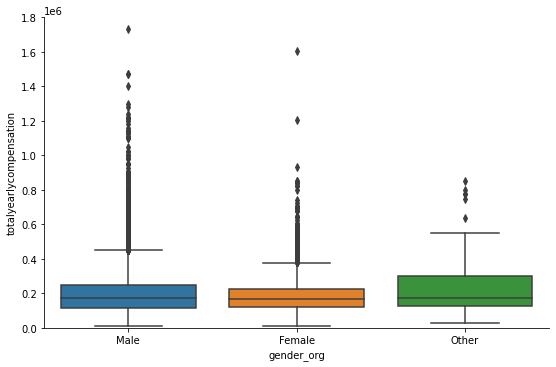

In [130]:
ax = sns.catplot(x="gender_org", y="totalyearlycompensation", kind="box", data=df_clean, aspect=1.5)
ax.set(ylim=(0, 1800000))

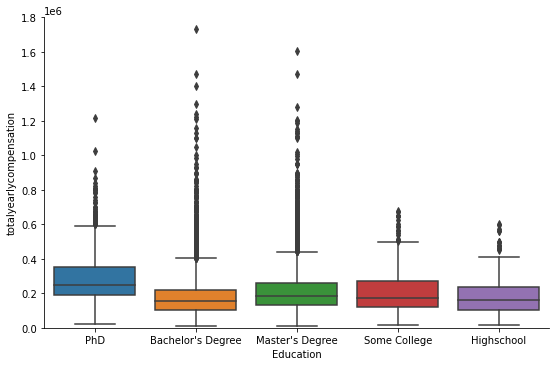

In [131]:
ax = sns.catplot(x="Education", y="totalyearlycompensation", kind="box", data=df_clean, aspect=1.5)
ax.set(ylim=(0, 1800000))

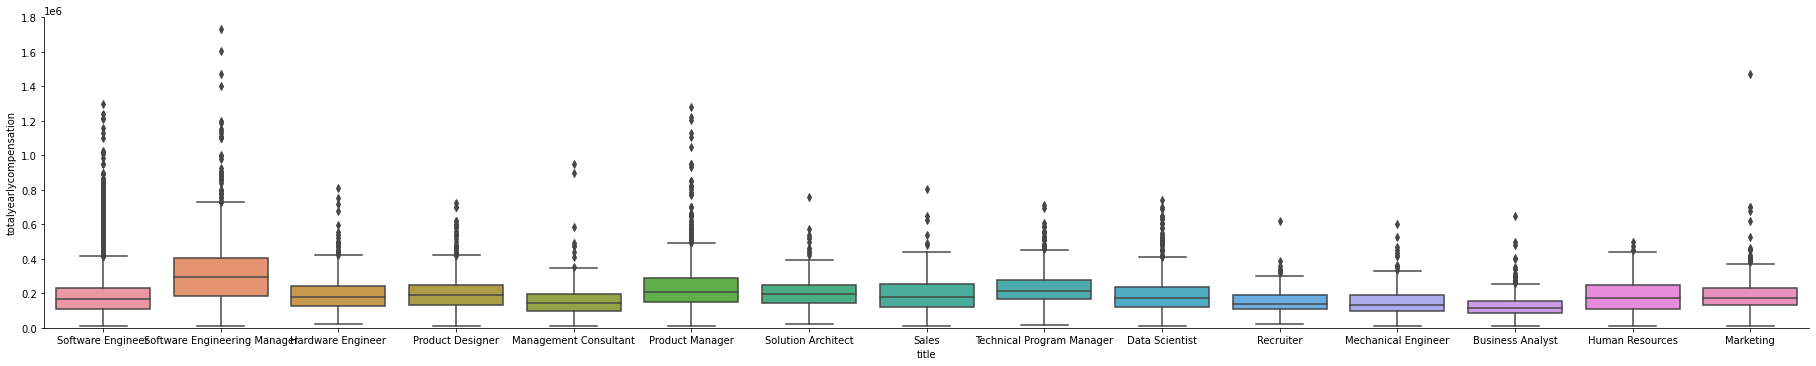

In [132]:
ax = sns.catplot(x="title", y="totalyearlycompensation", kind="box", data=df_clean, aspect=5)
ax.set(ylim=(0, 1800000))

In [133]:
df_clean.groupby('Education')['totalyearlycompensation'].median()

Education
Bachelor's Degree    156000
Highschool           161500
Master's Degree      187000
PhD                  250000
Some College         172000
Name: totalyearlycompensation, dtype: int64

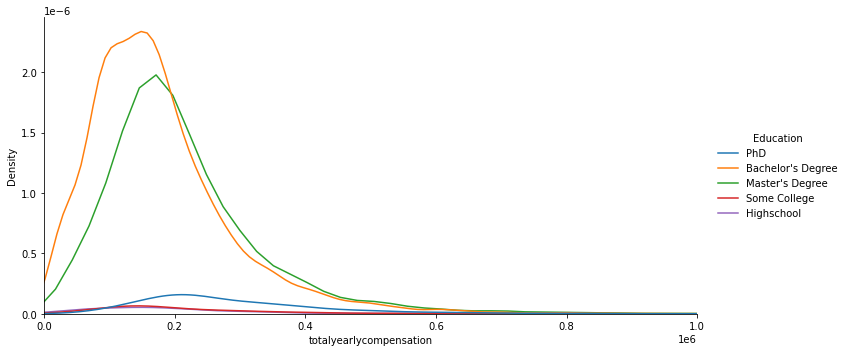

In [134]:
ax = sns.displot(df_clean, x="totalyearlycompensation", hue="Education", kind="kde",aspect = 2)
ax.set(xlim=(0, 1000000))

<AxesSubplot:>

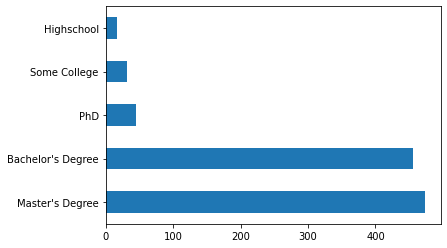

In [135]:
df_clean[df_clean['title']=='Software Engineering Manager']['Education'].value_counts().plot.barh()

<AxesSubplot:>

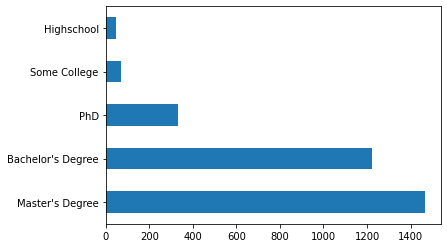

In [136]:
df_clean[df_clean['totalyearlycompensation']>300000]['Education'].value_counts().plot.barh()

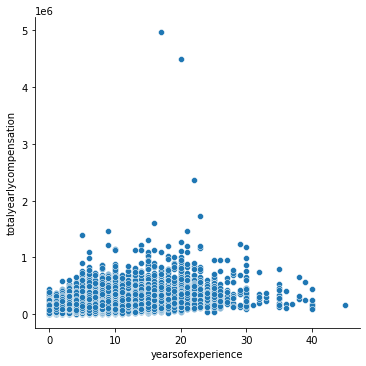

In [137]:
sns.relplot(x="yearsofexperience", y="totalyearlycompensation", data=df_clean,aspect=1)

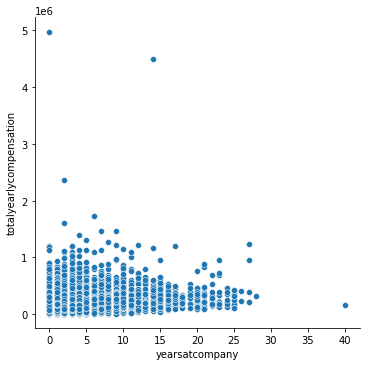

In [138]:
sns.relplot(x="yearsatcompany", y="totalyearlycompensation", data=df_clean, aspect=1)

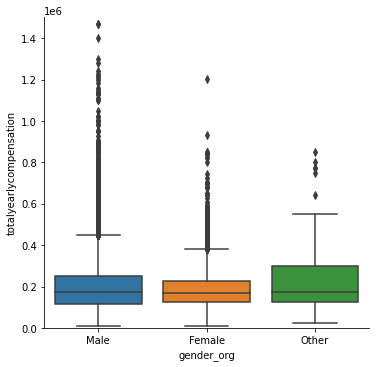

In [139]:
ax = sns.catplot(x="gender_org", y="totalyearlycompensation", kind="box", data=df_clean)
ax.set(ylim=(0, 1500000))

In [140]:
df_clean.groupby('Race')['totalyearlycompensation'].median()

Race
Asian          174000
Black          158000
Hispanic       168500
Two Or More    175000
White          175000
Name: totalyearlycompensation, dtype: int64

In [141]:
df_clean['totalyearlycompensation'].median()

174000.0

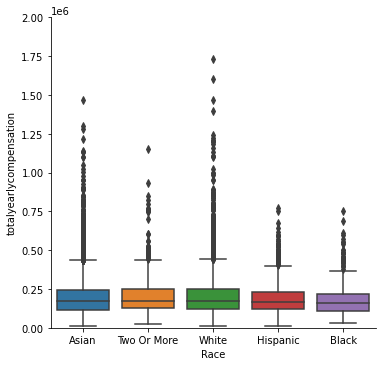

In [142]:
ax = sns.catplot(x="Race", y="totalyearlycompensation", kind="box", data=df_clean)
ax.set(ylim=(0, 2000000))

### Pairwise relationship

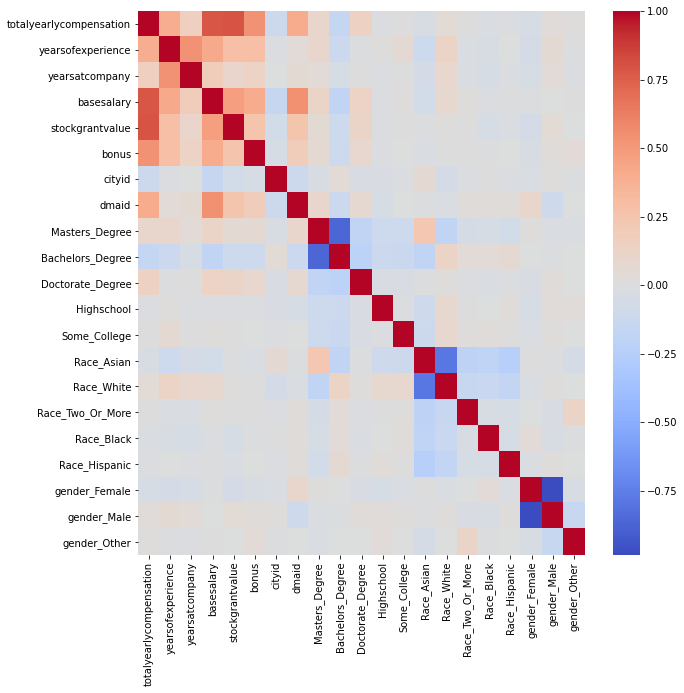

In [143]:
plt.figure(figsize=(10,10))
cor = df_clean.corr()
sns.heatmap(cor, cmap='coolwarm', fmt='0.1f')
plt.show()

In [144]:
#Correlation with output variable
cor_target = cor['totalyearlycompensation']
#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>0.1]
relevant_features.sort_values(ascending=False)

totalyearlycompensation    1.000000
stockgrantvalue            0.794439
basesalary                 0.784558
bonus                      0.540633
dmaid                      0.410527
yearsofexperience          0.402809
yearsatcompany             0.167440
Doctorate_Degree           0.139964
cityid                    -0.113290
Bachelors_Degree          -0.155165
Name: totalyearlycompensation, dtype: float64

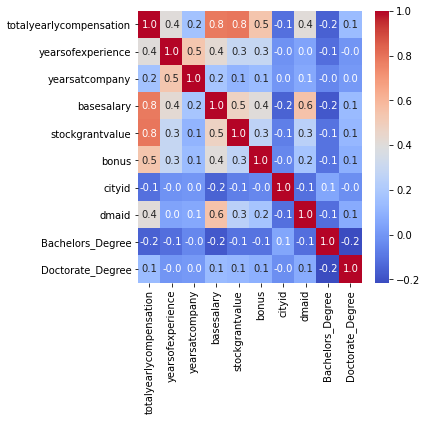

In [145]:
plt.figure(figsize=(5,5))
cor = df_clean[relevant_features.index].corr()
sns.heatmap(cor, cmap='coolwarm', annot = True, fmt='0.1f')
plt.show()

# Modeling

## Logistic Classification

In [146]:
from sklearn import metrics
# Train a simple LinearRegression
regr = linear_model.LogisticRegression()
regr.fit(X_train, Y_train)

predictions = regr.predict(X_test)


/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [147]:
metrics.accuracy_score(Y_test,predictions)

0.7333333333333333

## Decision Tree

In [148]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(random_state=10, min_samples_leaf=10, max_depth=6)
dt.fit(X_train, Y_train)
predictions = dt.predict(X_test)
acc_dt = dt.score(X_test, Y_test)

In [149]:
acc_dt

0.7855981416957026

## Evaluating fairness-related metrics

### Gender

Firstly, Fairlearn provides fairness-related metrics that can be compared between groups and for the overall population. Using existing metric definitions from scikit-learn we can evaluate metrics for subgroups within the data as below:

In [150]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
gm = MetricFrame(metrics=false_positive_rate, y_true=Y_test, y_pred=y_pred, sensitive_features=gender_test)
print(gm.overall)

0.19071566731141198


In [151]:
print(gm.by_group)

gender_org
Female    0.250958
Male      0.175353
Other          0.2
Name: false_positive_rate, dtype: object


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='gender_org'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='gender_org'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='gender_org'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='gender_org'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='gender_org'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='gender_org'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='gender_org'>,
        <AxesSubplot:xlabel='gender_org'>,
        <AxesSubplot:xlabel='gender_org'>]], dtype=object)

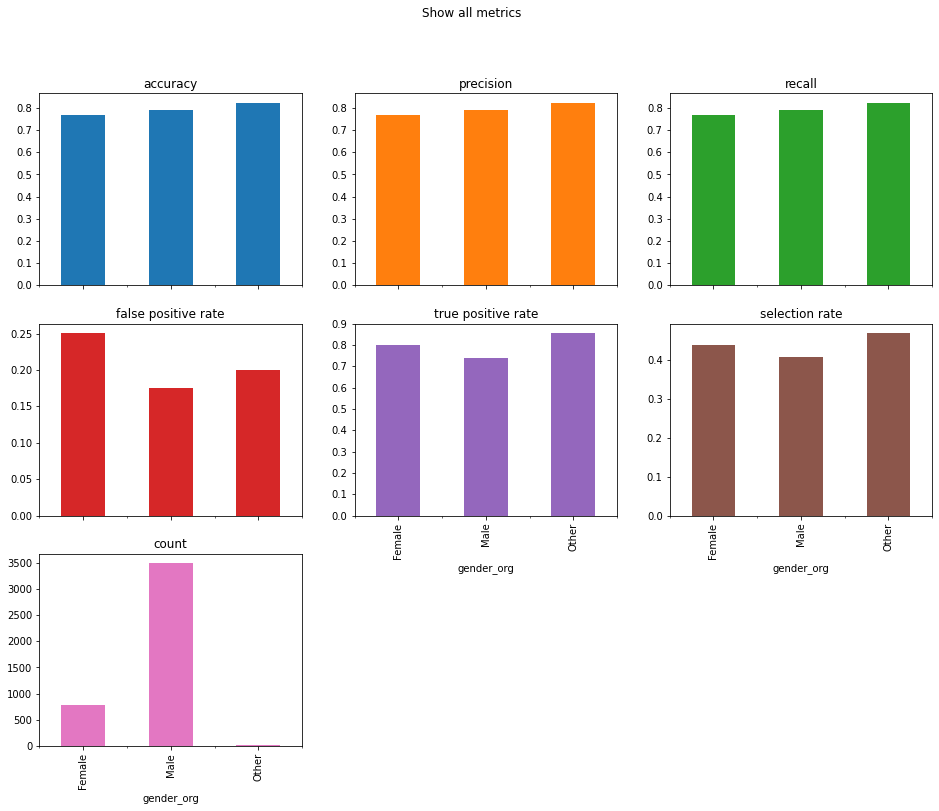

In [152]:
from fairlearn.metrics import selection_rate,false_positive_rate,true_positive_rate,count
from sklearn.metrics import precision_score, recall_score
from functools import partial

metrics = {
    'accuracy': accuracy_score,
    'precision': partial(precision_score, average='micro'),
    'recall': partial(recall_score, average= 'micro'),
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame = MetricFrame(metrics=metrics,
                           y_true=Y_test,
                           y_pred=y_pred,
                           sensitive_features=gender_test)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[16, 12],
    title="Show all metrics"
)

In [153]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

constraint = DemographicParity()
mitigator = ExponentiatedGradient(dt, constraint)
mitigator.fit(X_train, Y_train, sensitive_features=gender_train)

y_pred_mitigated = mitigator.predict(X_test)

fpr_mitigated = MetricFrame(metrics=false_positive_rate, y_true=Y_test, y_pred=y_pred_mitigated, sensitive_features=gender_test)
print(fpr_mitigated.overall)

0.18684719535783365


In [154]:
print(fpr_mitigated.by_group)

gender_org
Female    0.224138
Male      0.177302
Other          0.2
Name: false_positive_rate, dtype: object


### Race

In [163]:

y_pred = dt.predict(X_test)
gm = MetricFrame(metrics=false_positive_rate, y_true=Y_test, y_pred=y_pred, sensitive_features=race_test)
print(gm.overall)

0.19071566731141198


In [164]:
print(gm.by_group)

Race
Asian          0.195906
Black          0.210526
Hispanic       0.164062
Two Or More    0.152941
White          0.188119
Name: false_positive_rate, dtype: object


<AxesSubplot:xlabel='Race'>

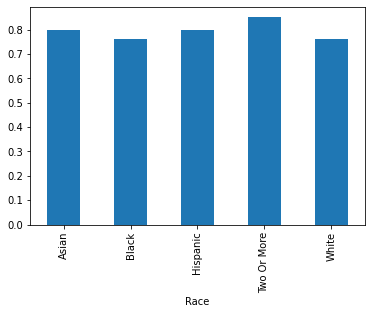

In [157]:
gm.by_group.plot.bar()

array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='Race'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='Race'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='Race'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='Race'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='Race'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='Race'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='Race'>,
        <AxesSubplot:xlabel='Race'>, <AxesSubplot:xlabel='Race'>]],
      dtype=object)

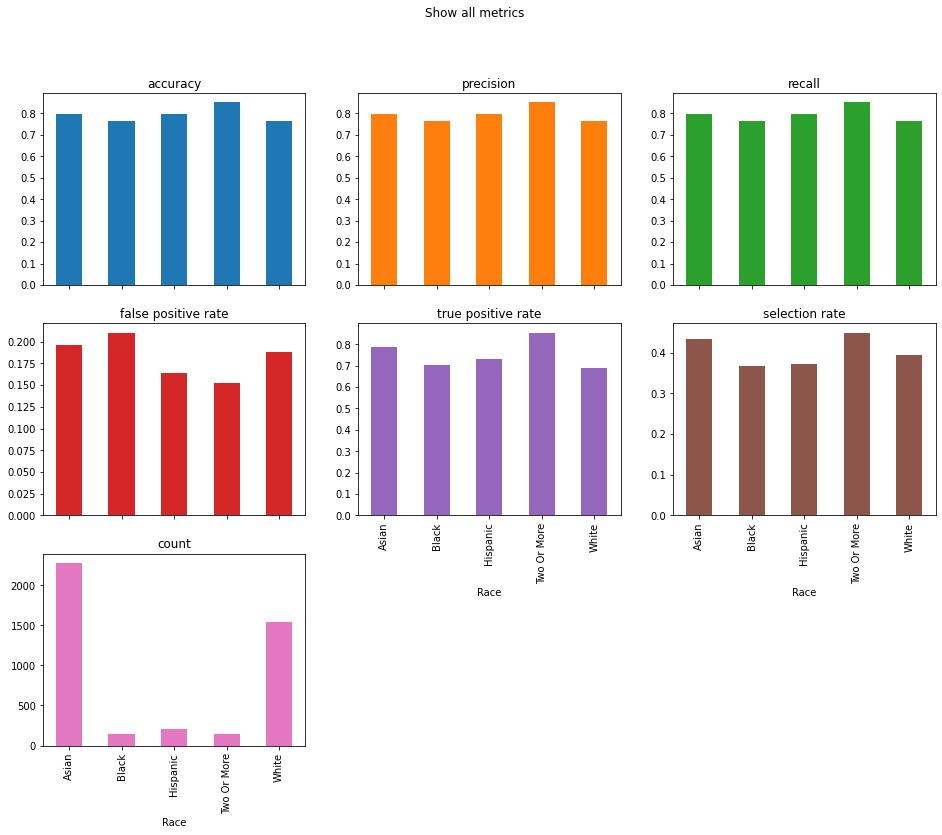

In [158]:
from fairlearn.metrics import selection_rate,false_positive_rate,true_positive_rate,count
from sklearn.metrics import precision_score, recall_score
from functools import partial

metrics = {
    'accuracy': accuracy_score,
    'precision': partial(precision_score, average='micro'),
    'recall': partial(recall_score, average= 'micro'),
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame = MetricFrame(metrics=metrics,
                           y_true=Y_test,
                           y_pred=y_pred,
                           sensitive_features=race_test)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[16, 12],
    title="Show all metrics"
)

In [165]:
constraint = DemographicParity()
mitigator = ExponentiatedGradient(dt, constraint)
mitigator.fit(X_train, Y_train, sensitive_features=race_train)

y_pred_mitigated = mitigator.predict(X_test)

ac_mitigated = MetricFrame(metrics=false_positive_rate, y_true=Y_test, y_pred=y_pred_mitigated, sensitive_features=race_test)
print(ac_mitigated.overall)

0.1849129593810445


In [166]:
ac_mitigated.by_group

Race
Asian           0.17617
Black          0.263158
Hispanic       0.171875
Two Or More    0.164706
White          0.193619
Name: false_positive_rate, dtype: object